# Sección 17: Teoremas Fundamentales y Métodos Numéricos

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, solve, Eq, sqrt, pi, exp, sin ,log, limit,oo

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Regla de L'Hôpital

**Teorema**: Para límites indeterminados de la forma $\frac{0}{0}$ o $\frac{\infty}{\infty}$:
$$\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)}$$

### Implementación con ejemplos:

In [ ]:
def lhopital_rule():
    x = symbols('x')
    
    # Ejemplo 1: Forma 0/0
    f1 = exp(x) - 1 # type:ignore
    g1 = sin(2*x)
    limit_expr1 = f1/g1
    
    print("=== Ejemplo 1 ===")
    print(f"Límite original: {limit_expr1}")
    
    # Aplicar L'Hôpital
    f1_prime = diff(f1, x)
    g1_prime = diff(g1, x)
    new_limit1 = f1_prime/g1_prime # type:ignore
    result1 = limit(new_limit1, x, 0)
    
    print(f"Después de L'Hôpital: {new_limit1}")
    print(f"Resultado: {result1}\n")
    
    # Ejemplo 2: Forma ∞/∞
    f2 = log(x)
    g2 = sqrt(x)
    limit_expr2 = f2/g2 # type:ignore
    
    print("=== Ejemplo 2 ===")
    print(f"Límite original (x→∞): {limit_expr2}")
    
    # Aplicar L'Hôpital
    f2_prime = diff(f2, x)
    g2_prime = diff(g2, x)
    new_limit2 = f2_prime/g2_prime # type:ignore
    result2 = limit(new_limit2, x, oo)
    
    print(f"Después de L'Hôpital: {new_limit2}")
    print(f"Resultado: {result2}")

lhopital_rule()


=== Ejemplo 1 ===
Límite original: (exp(x) - 1)/sin(2*x)
Después de L'Hôpital: exp(x)/(2*cos(2*x))
Resultado: 1/2

=== Ejemplo 2 ===
Límite original (x→∞): log(x)/sqrt(x)
Después de L'Hôpital: 2/sqrt(x)
Resultado: 0


## 2. Teorema del Valor Medio (MVT)

**Teorema**: Si $f$ es continua en $[a,b]$ y diferenciable en $(a,b)$, existe $c \in (a,b)$ tal que:
$$f'(c) = \frac{f(b) - f(a)}{b - a}$$

### Implementación con visualización:

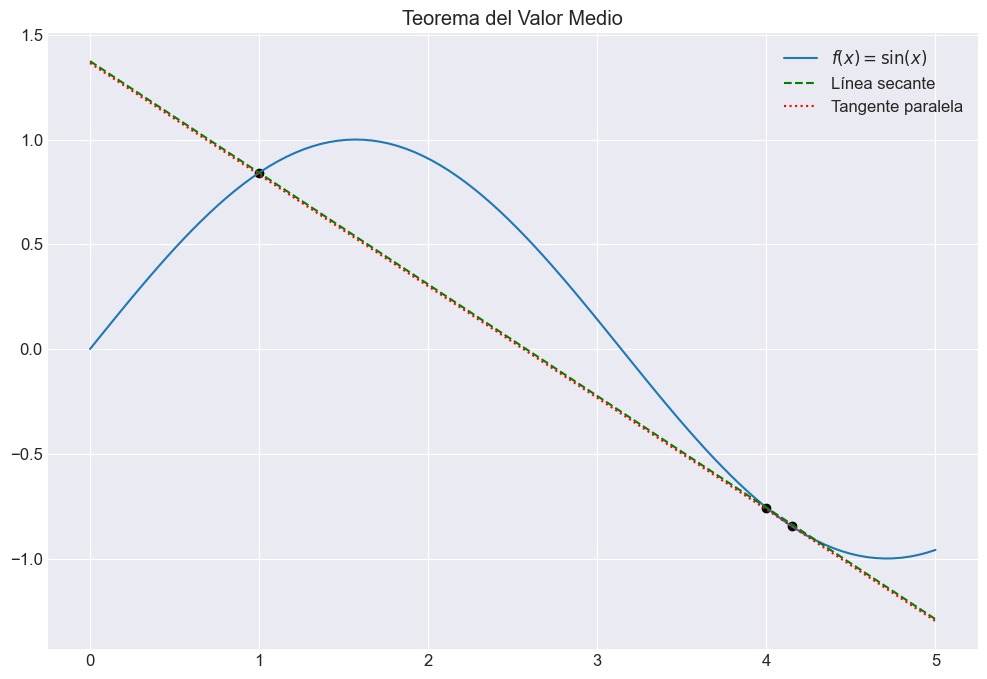

In [17]:
def mean_value_theorem():
    x = symbols('x')
    f = sin(x)  # Función de ejemplo
    a, b = 1, 4  # Intervalo
    
    # Calculamos la pendiente secante
    slope = (f.subs(x, b) - f.subs(x, a))/(b - a) # type:ignore
    
    # Encontramos el punto c que satisface MVT
    f_prime = diff(f, x)
    c = solve(Eq(f_prime, slope), x)[0]
    
    # Visualización
    x_vals = np.linspace(0, 5, 100)
    f_lamb = sp.lambdify(x, f, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=fr'$f(x) = \sin(x)$')
    
    # Línea secante
    secant = f.subs(x, a) + slope*(x - a) # type:ignore
    secant_lamb = sp.lambdify(x, secant, 'numpy')
    plt.plot(x_vals, secant_lamb(x_vals), 'g--', label='Línea secante')
    
    # Punto tangente
    tangent = f.subs(x, c) + slope*(x - c) # type:ignore
    tangent_lamb = sp.lambdify(x, tangent, 'numpy')
    plt.plot(x_vals, tangent_lamb(x_vals), 'r:', label='Tangente paralela')
    
    plt.scatter([a, b, c], [f.subs(x, a), f.subs(x, b), f.subs(x, c)], color='black') # type:ignore
    plt.title('Teorema del Valor Medio')
    plt.legend()
    plt.grid(True)
    plt.show()

mean_value_theorem()


## 3. Teorema de Rolle

**Teorema**: Caso especial del MVT cuando $f(a) = f(b)$. Existe $c \in (a,b)$ tal que $f'(c) = 0$.

### Implementación con ejemplo:

Punto crítico en c = 1.41 donde f'(c) = 0


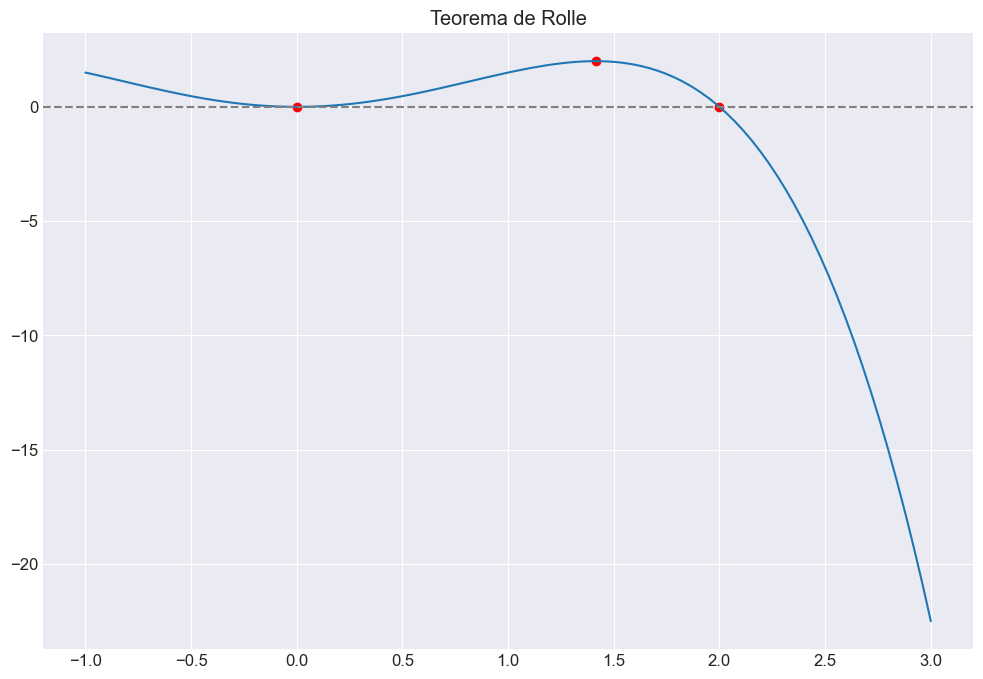

In [18]:
def rolles_theorem():
    x = symbols('x')
    f = -x**4/2 + 2*x**2  # Función de ejemplo
    a, b = 0, 2  # Intervalo con f(a)=f(b)=0
    
    # Verificamos condiciones
    assert f.subs(x, a) == f.subs(x, b), "f(a) debe ser igual a f(b)"
    
    # Encontramos punto crítico
    f_prime = diff(f, x)
    critical_points = solve(Eq(f_prime, 0), x)
    c = [cp for cp in critical_points if a < cp < b][0]
    
    print(f"Punto crítico en c = {c.evalf():.2f} donde f'(c) = 0")
    
    # Visualización
    x_vals = np.linspace(-1, 3, 100)
    f_lamb = sp.lambdify(x, f, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals))
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.scatter([a, b, c], [0, 0, f.subs(x, c)], color='red')
    plt.title('Teorema de Rolle')
    plt.grid(True)
    plt.show()

rolles_theorem()


## 4. Método de Newton

**Fórmula iterativa**: Para aproximar raíces de $f(x) = 0$:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

### Implementación con ejemplo:

In [ ]:
def newtons_method():
    x = symbols('x')
    f = x**2 - x  # Función de ejemplo
    x0 = -1.0     # Valor inicial
    tolerance = 1e-4
    max_iter = 10
    
    f_prime = diff(f, x)
    
    print("=== Método de Newton ===")
    print(f"Función: {f} = 0")
    print(f"Derivada: {f_prime}")
    print(f"Valor inicial: x0 = {x0}")
    
    # Iteraciones
    xn = x0
    for n in range(max_iter):
        f_val = float(f.subs(x, xn))
        f_prime_val = float(f_prime.subs(x, xn)) # type:ignore
        
        if abs(f_prime_val) < 1e-10:
            print("Derivada cercana a cero. Método falla.")
            break
            
        xn1 = xn - f_val/f_prime_val
        error = abs(xn1 - xn)
        
        print(f"Iteración {n+1}: xn = {xn:.6f}, f(xn) = {f_val:.6f}, xn+1 = {xn1:.6f}")
        
        if error < tolerance:
            print(f"\nConvergencia alcanzada después de {n+1} iteraciones")
            print(f"Aproximación de la raíz: {xn1:.6f}")
            break
            
        xn = xn1
    else:
        print("Máximo de iteraciones alcanzado sin convergencia")

newtons_method()


=== Método de Newton ===
Función: x**2 - x = 0
Derivada: 2*x - 1
Valor inicial: x0 = -1.0
Iteración 1: xn = -1.000000, f(xn) = 2.000000, xn+1 = -0.333333
Iteración 2: xn = -0.333333, f(xn) = 0.444444, xn+1 = -0.066667
Iteración 3: xn = -0.066667, f(xn) = 0.071111, xn+1 = -0.003922
Iteración 4: xn = -0.003922, f(xn) = 0.003937, xn+1 = -0.000015
Iteración 5: xn = -0.000015, f(xn) = 0.000015, xn+1 = -0.000000

Convergencia alcanzada después de 5 iteraciones
Aproximación de la raíz: -0.000000


## Resumen Teórico Completo

| **Teorema/Método**       | **Fórmula/Enunciado**                          | **Aplicación**                                  |
|--------------------------|-----------------------------------------------|------------------------------------------------|
| **Regla de L'Hôpital**   | $\lim \frac{f}{g} = \lim \frac{f'}{g'}$      | Límites indeterminados 0/0 o ∞/∞               |
| **Teorema del Valor Medio** | $f'(c) = \frac{f(b)-f(a)}{b-a}$            | Existencia de tangente paralela a la secante    |
| **Teorema de Rolle**     | $f'(c) = 0$ si $f(a)=f(b)$                   | Existencia de puntos críticos                   |
| **Método de Newton**     | $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$     | Aproximación numérica de raíces     
